In [12]:
import numpy as np
import matplotlib.pyplot as plt

tau = np.pi*2
radius = 10
r2 = 5
chords_to_draw = 1000

In [13]:
def intersects(line,circles):
    x0,x1 = line[0][0], line[1][0]
    y0,y1 = line[0][1], line[1][1]
    
    for circle in circles:
        center = circle.center
        radius = circle.radius

        gradient = (y1-y0)/(x1-x0)
        intercept = y1-(gradient*x1)
        
        distance = (np.abs(gradient*center[0] - center[1] + intercept))/(np.sqrt(gradient**2 + 1))
        
        if distance <= radius:
            return True
    
    return False

In [14]:
def draw_chord(p1,p2,c1,thickness):
    x1,x2 = p1[0], p2[0]
    y1,y2 = p1[1], p2[1]

    if intersects((p1,p2), c1):
        plt.plot([x1,x2],[y1,y2],'black',linewidth=thickness)
        return True
    else:
        plt.plot([x1,x2],[y1,y2],'black',linewidth=thickness)
        return False

In [15]:
def get_coords(r,theta):
    return r * np.cos(theta), r * np.sin(theta)

In [16]:
def get_chord(x,y,r,angle):
    chord_length = np.sqrt(r**2 - (np.sqrt(x**2 + y**2))**2)
    p1 = x + chord_length * np.cos(angle), y + chord_length * np.sin(angle)
    p2 = x - chord_length * np.cos(angle), y - chord_length * np.sin(angle)

    return p1,p2

# Method 1:

Choosing 2 random points on the radius of the circle and connecting them.

In [17]:
chords = []

for i in range(chords_to_draw):
    # generate random angles
    a1 = np.random.uniform() * tau
    a2 = np.random.uniform() * tau
    # generate points from angles
    p1 = get_coords(radius,a1)
    p2 = get_coords(radius,a2)
    chords.append((p1,p2))


674 valid chords 
326 invalid chords


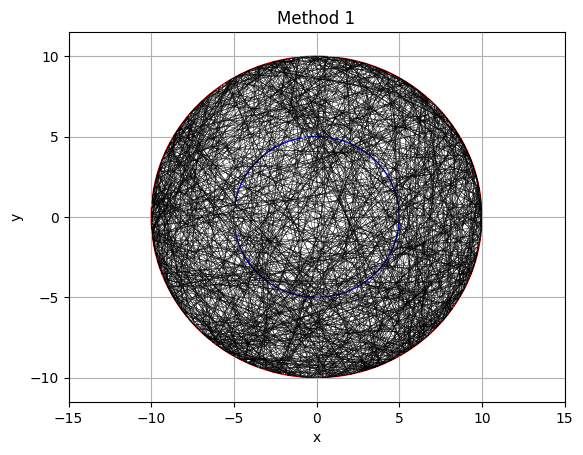

In [18]:
circle1 = plt.Circle((0,0), radius, color='red', fill=False)
circle_small1 = plt.Circle((0,0), r2, color='blue', fill=False)

bodies = [circle_small1]

fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title("Method 1")
ax.set_xlim((-radius - 0.5*radius, radius + 0.5*radius)), ax.set_ylim((-radius - 0.15*radius, radius + 0.15*radius))
ax.add_artist(circle1)
ax.add_artist(circle_small1)

total = chords_to_draw

for i in range(len(chords)):
    if draw_chord(chords[i][0],chords[i][1],bodies,0.3):
        total -= 1

print(str(total) + " valid chords \n" + str(chords_to_draw - total) + " invalid chords")

# Method 2:

Choose a random point on the diameter line and draw a perpendicular bisector as a chord.

In [19]:
chords2 = []

for i in range(chords_to_draw):
    # generate random radius angle
    angle = np.random.uniform() * tau
    x, y = get_coords(radius,angle)

    # subtract 90 degrees (pi/2) to get perpendicular
    angle_perp = angle - np.pi/2
    x_perp, y_perp = get_coords(radius, angle_perp)

    # choose a random radius length
    r_length = np.random.uniform() * radius
    x, y = get_coords(r_length, angle)
    midpoint = (x,y)

    # generates chord perpendicular to end of partial radius
    p1, p2 = get_chord(x,y,radius,angle_perp)

    chords2.append((p1,p2))

508 valid chords 
492 invalid chords


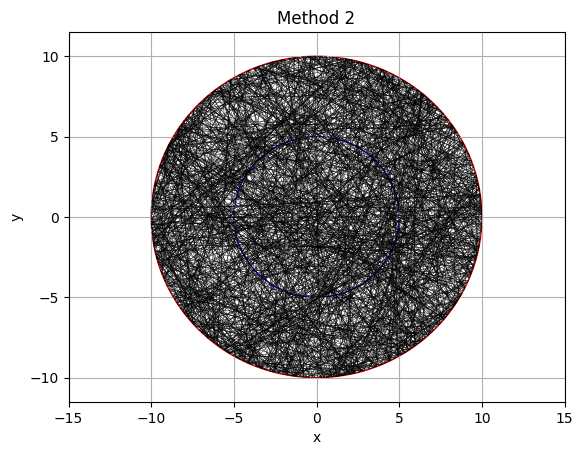

In [20]:
circle2 = plt.Circle((0,0), radius, color='red', fill=False)
circle_small = plt.Circle((0,0), r2, color='blue', fill=False)

bodies = [circle_small]

fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title("Method 2")
ax.set_xlim((-radius - 0.5*radius, radius + 0.5*radius)), ax.set_ylim((-radius - 0.15*radius, radius + 0.15*radius))
ax.add_artist(circle2)
ax.add_artist(circle_small)

total = chords_to_draw

for i in range(len(chords2)):
    if draw_chord(chords2[i][0],chords2[i][1],bodies,0.3):
        total -= 1

print(str(total) + " valid chords \n" + str(chords_to_draw - total) + " invalid chords")

# Method 3:

Choose a random point within the circle and use it as the midpoint of the chord.

In [21]:
chords3 = []

for i in range(chords_to_draw):
    # generate random midpoint
    angle = np.random.uniform() * tau
    r_rand = np.sqrt(np.random.uniform())
    x_mid = r_rand * radius * np.cos(angle)
    y_mid = r_rand * radius * np.sin(angle)
    midpoint = (x_mid, y_mid)

    # reuse code from Method 2 to generate chord from midpoint
    angle_chord = angle - np.pi/2
    p1,p2 = get_chord(x_mid,y_mid,radius,angle_chord)

    chords3.append((p1,p2))

762 valid chords 
238 invalid chords


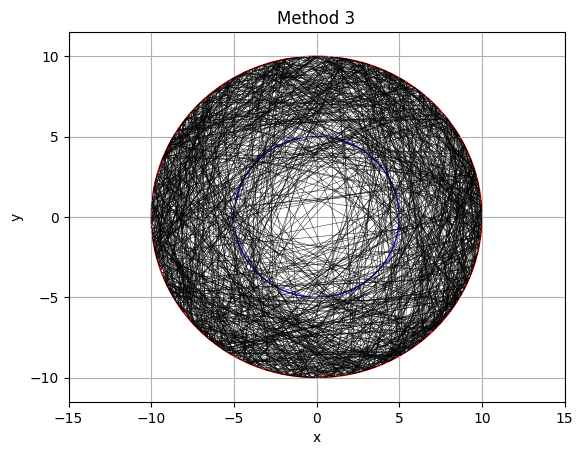

In [22]:
circle3 = plt.Circle((0,0), radius, color='red', fill=False)
circle_small = plt.Circle((0,0), r2, color='blue', fill=False)

bodies = [circle_small]

fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title("Method 3")
ax.set_xlim((-radius - 0.5*radius, radius + 0.5*radius)), ax.set_ylim((-radius - 0.15*radius, radius + 0.15*radius))
ax.add_artist(circle3)
ax.add_artist(circle_small)

total = chords_to_draw

for i in range(len(chords3)):
    if draw_chord(chords3[i][0],chords3[i][1],bodies,0.3):
        total -= 1

print(str(total) + " valid chords \n" + str(chords_to_draw - total) + " invalid chords")